# Introduction

The bike sharing industry has seen significant growth over the past decade, providing a convenient, environmentally friendly, and healthy transportation option for city dwellers and tourists alike. In this rapidly changing landscape, understanding customer behaviors and preferences is crucial for companies to stay competitive and grow.

This analysis focuses on a bike sharing company in Chicago, specifically examining differences between two types of riders: casual riders and annual members. Casual riders are those who use the service occasionally, often on an as-needed basis, while annual members are regular users who have committed to a yearly subscription.

In the following sections, we will delve into the data, exploring various aspects of rider behavior and drawing insights that can inform these strategic decisions.

# Part 1 - Ask

**The problem** we are trying to solve is maximising the number of annual memberships at Cyclistic. 

While Cyclistic has been successfully attracting casual riders and annual members, the company's finance analysts have determined that annual members are more profitable. Therefore, the marketing director believes converting casual riders into annual members will benefit the company's future growth.

To address this problem, the marketing analyst team aims to understand the differences between casual riders and annual members regarding usage patterns, preferences, and behaviours. By uncovering these insights through data analysis, you can design a new marketing strategy that explicitly targets casual riders to encourage them to become annual members. 

**Insights** about the differences between casual riders and annual members can drive business decisions in a variety of ways:

-  Help design marketing strategies that specifically target casual riders to convert them into annual members, resulting in higher conversion rates and increased revenue.  

- Understanding customer preferences and behaviours can optimise pricing plans to encourage casual riders to purchase annual memberships, increasing conversions and revenue.  

- Provide the the product development team with more information, enabling the introduction of features that attract more annual memberships.

# Part 2 - Prepare


The Data:  
The dataset comes from Divvybikes (https://divvybikes.com/system-data). And is provided according to the Divvy Data License Agreement.

It is provided in csv files. Each file represents a specific month. It includes:


    Trip start day and time
    Trip end day and time
    Trip start station
    Trip end station
    Rider type (Member, Single Ride, and Day Pass)

The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

# Process

For this part the decision was to use Python for the analysis. The dataset is big, and the packages and versatallity the language offers for analysis makes the language suitable for the task.  

So after mannualy downloading the previous 12 months of cyclistic data, each file was unzipped and sent over to a specific folder "data". Once we checked all the files had the same structure we used a for loop to automatically merge all the data into a single dataset. 

New features have been created, like the total ride duration, distance and day of week.


In [2]:
import pandas as pd
from geopy.distance import geodesic
import os

from matplotlib import pyplot as plt

import seaborn as sb

# Helper functions

In [197]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f},\n minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)
    
    while outlier_count > 0:
        loop_count += 1
        
        if (loop_count > 100):
            break
        
        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    return df_in

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    plt.title(title, fontdict={'size':10})
    return sb.boxplot(x = df_in[col_name])
    
    plt.show()

def annotate_bar(ax, alt_names = None, pct = False):
    i = 0
    tot_height = 0.
    if pct == True:
        for p in ax.patches:
            tot_height += p.get_height()
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{round(height/tot_height*100,2):.2f}%',  # Format the text to display with two decimal places
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Adjust the offset of the text above the bar
                            textcoords="offset points",
                            ha='center', va='bottom')
        return 0
        
        
    for p in ax.patches:
        height = p.get_height()
        if alt_names == None:
            ax.annotate(f'{height:.2f}',  # Format the text to display with two decimal places
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 5),  # Adjust the offset of the text above the bar
                        textcoords="offset points",
                        ha='center', va='bottom')
        else:
            ax.annotate(f'{alt_names[i]}',  # Format the text to display with two decimal places
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Adjust the offset of the text above the bar
                            textcoords="offset points",
                            ha='center', va='bottom')
            i += 1
    return None

# Data Merging
<a id='1'></a>

[1](#1) [2](#2)

In [4]:
part1 = False

In [5]:
if part1:
    df = pd.read_csv('./data/202206-divvy-tripdata.csv')

In [6]:
if part1:
    print(df.shape)
    df.isna().sum()

In [7]:
if part1:
    filenames_list = os.listdir('./data')
    filenames_list.sort()
    print(filenames_list)

In [8]:
if part1:
    df_s = []
    for i in filenames_list:
        df_s.append(pd.read_csv(f'./data/{i}'))

In [9]:
if part1:
    df_s_column_names =[]
    for i in df_s:
        df_s_column_names.append(list(i.columns))

In [10]:
if part1:
    for i in range(1,len(df_s_column_names)):
        print(df_s_column_names[0] == df_s_column_names[i], end = ' ')

In [11]:
if part1:
    df = df_s[0].copy()
    for i in range(1,len(df_s)):
        df = pd.concat([df, df_s[i]])

In [12]:
if part1:
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace = True)

In [13]:
if part1:
    df.to_pickle('./workflow_data/df.pkl')
else:
    df = pd.read_pickle('./workflow_data/df.pkl') #1m40s

<a id='2'></a>
# Checking the data

- Data overview:

In [14]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual


In [15]:
print(df.shape)
print(f'Data has {df.shape[0]} rows and {df.shape[1]} fields.')

(5829030, 13)
Data has 5829030 rows and 13 fields.


- Checking for NAs:

In [16]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    834545
start_station_id      834677
end_station_name      891757
end_station_id        891898
start_lat                  0
start_lng                  0
end_lat                 5961
end_lng                 5961
member_casual              0
dtype: int64

- Checking Duplicates:

In [17]:
df.duplicated().sum()

0

- Checking data types:

In [18]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [19]:
df = df.astype({'ride_id':'str', 
                'rideable_type':'category', 
                'start_station_name':'category',
                'end_station_name':'category',
                'member_casual': 'category',
                'start_station_id': 'category',
                'end_station_id': 'category',
                'start_lat': 'float32',
                'start_lng': 'float32',
                'end_lat': 'float32',
                'end_lng': 'float32'})


df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)

In [20]:
df.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
dtype: object

- Data contained in each field:

In [21]:
feature_list = df.columns

- For now, drop NaNs. We can try to recover NaN by cross-refferencing data:

In [44]:
df_clean = df.dropna().reset_index(drop = True)

In [45]:
df_nan = df[df.isna().any(axis = 1)].reset_index(drop = True)


In [46]:
print(f'''Total rows: {df.shape[0]:,}
Rows in nan dataset: {df_nan.shape[0]:,}
Rows in clean dataset: {df_clean.shape[0]:,}''')

Total rows: 5,829,030
Rows in nan dataset: 1,334,349
Rows in clean dataset: 4,494,681


- Checking unique values:

In [26]:
for feature in feature_list:
    print(f'Feature -> {feature}: {len(df_clean[feature].unique())}')
    if len(df_clean[feature].unique()) < 5:
        print(df_clean[feature].unique(),end = "\n\n")

Feature -> ride_id: 4494681
Feature -> rideable_type: 3
['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike']

Feature -> started_at: 3905893
Feature -> ended_at: 3919337
Feature -> start_station_name: 1745
Feature -> start_station_id: 1420
Feature -> end_station_name: 1777
Feature -> end_station_id: 1424
Feature -> start_lat: 32084
Feature -> start_lng: 15244
Feature -> end_lat: 2868
Feature -> end_lng: 2556
Feature -> member_casual: 2
['casual', 'member']
Categories (2, object): ['casual', 'member']



In [30]:
# df_clean.info(memory_usage='deep')  # have set types to category(RAM...)

- Now we generate a list of min/max values for some of the coordinates of starting locations

In [47]:
coord = df_clean[['start_lat','start_lng','start_station_id']].groupby('start_station_id').agg(['min','max','mean']).reset_index()
coord.columns = ['_'.join(col).strip() for col in coord.columns.values]

In [48]:
df_nan_shot = df_nan.head().reset_index()

In [49]:
coord.columns

Index(['start_station_id_', 'start_lat_min', 'start_lat_max', 'start_lat_mean',
       'start_lng_min', 'start_lng_max', 'start_lng_mean'],
      dtype='object')

In [50]:
def check(lat,lng):
    return (coord[(lat >= coord['start_lat_min'] ) &
                (lat <= coord['start_lat_max'] ) &
                (lng >= coord['start_lng_min'] ) &
                (lng <= coord['start_lng_max'] ) ])
    

# Features

## Calculating Ride Duration

In [51]:
df_clean['duration'] = df_clean.ended_at - df_clean.started_at

In [52]:
df_clean['duration_days'] = df_clean.duration.dt.days

In [53]:
df_clean['duration_minutes'] = df_clean.duration.dt.seconds / 60

In [54]:
df_clean['duration_minutes_tot'] = df_clean.duration_minutes + (df_clean.duration_days * 1440)

## Calculating Distances

In [55]:
# Inserting distances in df:

run_this = False
if run_this:
    df_clean['distance'] = df_clean.apply(lambda row: geodesic(
                                                               (row['start_lat'], row['start_lng']),
                                                               (row['end_lat'], row['end_lng'])).meters,
                                                               axis = 1)
# 32min task                                      

In [56]:
# df_clean.to_pickle('./workflow_data/df_clean.pkl')

## Working on dates

In [57]:
df_clean['day'] = df_clean['started_at'].dt.day
df_clean['month'] = df_clean['started_at'].dt.month
df_clean['year'] = df_clean['started_at'].dt.year
df_clean['dow'] = df_clean['started_at'].dt.dayofweek  #  Monday=0, Sunday=6.

In [58]:
df_clean.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration_days,duration_minutes,duration_minutes_tot,day,month,year,dow
4494676,AFA79AAD52DC38CA,electric_bike,2023-05-16 20:08:42,2023-05-16 20:11:34,Kedzie Ave & Chicago Ave,KA1504000114,Kedzie Ave & Lake St,KA1504000106,41.895531,-87.706161,...,-87.706306,member,0 days 00:02:52,0,2.866667,2.866667,16,5,2023,1
4494677,EDD9F6FAF495D461,electric_bike,2023-05-16 20:08:31,2023-05-16 20:11:39,Kedzie Ave & Chicago Ave,KA1504000114,Kedzie Ave & Lake St,KA1504000106,41.895527,-87.706161,...,-87.706306,member,0 days 00:03:08,0,3.133333,3.133333,16,5,2023,1
4494678,DD4936C828A456BB,electric_bike,2023-05-17 22:32:41,2023-05-17 22:37:20,Kedzie Ave & Chicago Ave,KA1504000114,Kedzie Ave & Lake St,KA1504000106,41.895462,-87.706169,...,-87.706306,casual,0 days 00:04:39,0,4.650000,4.650000,17,5,2023,2
4494679,3FA477DB3AD55E63,electric_bike,2023-05-27 21:10:14,2023-05-27 21:15:46,Kedzie Ave & Chicago Ave,KA1504000114,Kedzie Ave & Lake St,KA1504000106,41.895424,-87.706085,...,-87.706306,casual,0 days 00:05:32,0,5.533333,5.533333,27,5,2023,5
4494680,91F79BE154023A2F,classic_bike,2023-05-18 15:07:56,2023-05-18 15:16:20,Greenwood Ave & 47th St,TA1308000002,Cottage Grove Ave & 51st St,TA1309000067,41.809834,-87.599380,...,-87.606613,member,0 days 00:08:24,0,8.400000,8.400000,18,5,2023,3


In [59]:
# Reading previously saved pickle, this overrides df_clean(pre-saved df_clean):
df_clean = pd.read_pickle('./workflow_data/df_clean.pkl')  #45s

# Descriptive Statistics

In [62]:
df_clean.dtypes

ride_id                          object
rideable_type                  category
started_at               datetime64[ns]
ended_at                 datetime64[ns]
start_station_name             category
start_station_id               category
end_station_name               category
end_station_id                 category
start_lat                       float32
start_lng                       float32
end_lat                         float32
end_lng                         float32
member_casual                  category
duration                timedelta64[ns]
distance                        float64
duration_days                     int64
duration_minutes                float64
duration_minutes_tot            float64
day                               int32
month                             int32
year                              int32
dow                               int32
dtype: object

In [63]:
num_attributes = df_clean[['duration_minutes_tot','distance']]

In [64]:
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T



In [299]:
m = pd.concat([d2, d3, d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attribute', 'min', 'max', 'range','mean', 'median', 'std', 'skew', 'kurtosis']
pd.options.display.float_format = '{:.2f}'.format
m

,attribute,min,max,range,mean,median,std,skew,kurtosis
0,duration_minutes_tot,-168.70,32035.45,32204.15,16.29,10.15,36.23,190.39,142819.40
1,distance,0.00,9817319.18,9817319.18,2086.09,1542.34,13223.37,727.60,539987.68


- There are some strange observations, like negative numbers in the amount of time a bike has been used. And a maximum distance distances of roughtly 9.800km.

In [65]:
# df_clean[df_clean['duration_minutes_tot'] < 3]

### Categotical Attributes

In [66]:
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'distance', 'duration_days',
       'duration_minutes', 'duration_minutes_tot', 'day', 'month', 'year',
       'dow'],
      dtype='object')

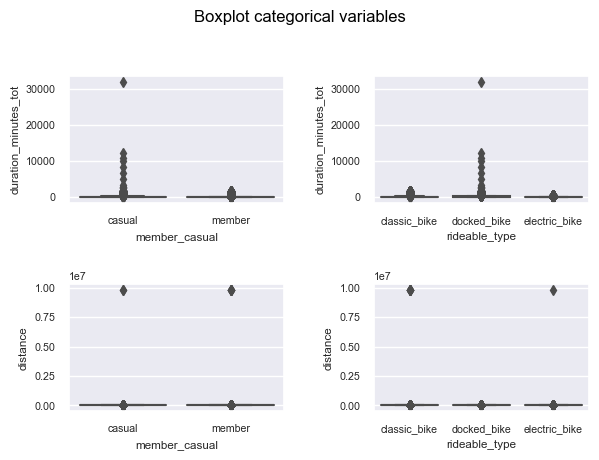

In [67]:
plt.suptitle("Boxplot categorical variables")
sb.set(font_scale = .7)
plt.subplot(2,2,1)
sb.boxplot(x = 'member_casual', y = 'duration_minutes_tot', data = df_clean)
plt.subplot(2,2,2)
sb.boxplot(x = 'rideable_type', y = 'duration_minutes_tot', data = df_clean)
plt.subplot(2,2,3)
sb.boxplot(x = 'member_casual', y = 'distance', data = df_clean)
plt.subplot(2,2,4)
sb.boxplot(x = 'rideable_type', y = 'distance', data = df_clean)
plt.tight_layout(pad=2.6)
plt.show()

- Outliers need to be treated

- Following a similat approach we can do the same for distance, we are not applying a bottom cutoff, since some bikes might be returned to the same location, and the bottom duration cutoff would take care of non usual cases already.

## Eliminating Outliers

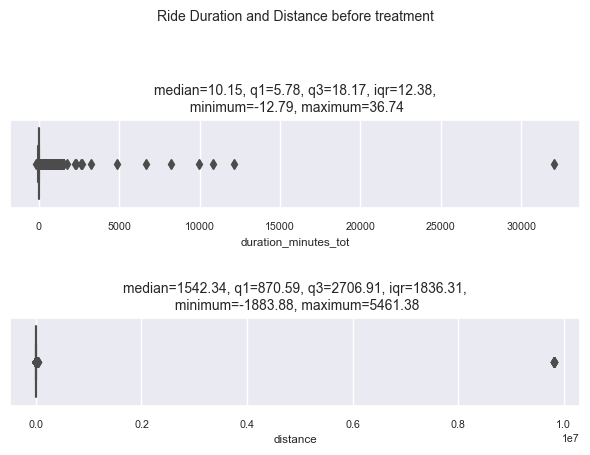

duration_minutes_tot has 338171 outliers
distance has 255425 outliers


In [68]:
plt.suptitle("Ride Duration and Distance before treatment")
plt.subplot(2,1,1)
box_and_whisker(df_clean, 'duration_minutes_tot')
plt.subplot(2,1,2)
box_and_whisker(df_clean, 'distance')
plt.tight_layout(pad=3.0)
plt.show()
print(f"duration_minutes_tot has {count_outliers(df_clean, 'duration_minutes_tot')} outliers")
print(f"distance has {count_outliers(df_clean, 'distance')} outliers")

rows before removing: 4494681
rows after removing: 3611794


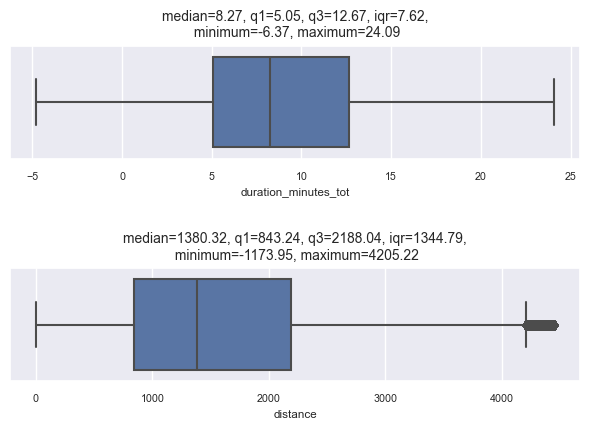

In [69]:
# Removing outliers
print(f"rows before removing: {df_clean.shape[0]}")
dfa = remove_all_outliers(df_clean, 'distance')
dfa = remove_all_outliers(dfa, 'duration_minutes_tot')
print(f"rows after removing: {dfa.shape[0]}")


# Plotting ending result
plt.subplot(2,1,1)
box_and_whisker(dfa, 'duration_minutes_tot')
plt.subplot(2,1,2)
box_and_whisker(dfa, 'distance')
plt.tight_layout(pad=3.0)
plt.show()


- All ouliers were removed for both variables, however since we are removing outliers on 2 different features, once we were done removing
the outliers for distance, a new outlier clean-up was executed on duration_minutes_tot. This will generate new outlines since it will change the data.

# Analysis

In [70]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,duration,distance,duration_days,duration_minutes,duration_minutes_tot,day,month,year,dow
0,B12AD6565494C368,classic_bike,2022-06-09 22:28:32,2022-06-09 22:52:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697151,...,casual,0 days 00:23:45,0.000000,0,23.750000,23.750000,9,6,2022,3
1,BAD4CB075003A605,electric_bike,2022-06-19 17:08:23,2022-06-19 17:08:25,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922615,-87.697151,...,casual,0 days 00:00:02,8.897810,0,0.033333,0.033333,19,6,2022,6
2,76DAD9FC95774B53,electric_bike,2022-06-26 23:59:44,2022-06-27 00:25:26,Burnham Greenway & 105th St,20222,Burnham Greenway & 105th St,20222,41.704628,-87.528412,...,casual,0 days 00:25:42,16.354016,0,25.700000,25.700000,26,6,2022,6
3,47DE68ACCA138C13,electric_bike,2022-06-27 11:40:53,2022-06-27 11:50:16,Wood St & Chicago Ave,637,California Ave & Division St,13256,41.895611,-87.672096,...,casual,0 days 00:09:23,2261.201191,0,9.383333,9.383333,27,6,2022,0
4,5D899636D3334ED5,classic_bike,2022-06-27 16:01:13,2022-06-27 16:35:56,California Ave & Division St,13256,California Ave & Division St,13256,41.903030,-87.697472,...,casual,0 days 00:34:43,0.000000,0,34.716667,34.716667,27,6,2022,0


### Usage overview

In [71]:
df_by_rideable_type = df_clean[['rideable_type', 'distance', 'duration_minutes_tot']].groupby('rideable_type').agg(['count','median']).reset_index()
df_by_rideable_type.columns = df_by_rideable_type.columns.droplevel(1)
df_by_rideable_type.columns = ['rideable_type', 'count', 'median_distance', 'count2', 'median_duration']
df_by_rideable_type.drop(columns='count2', inplace = True)
df_by_rideable_type

,rideable_type,count,median_distance,median_duration
0,classic_bike,2584947,1447.972057,10.583333
1,docked_bike,154494,1599.573948,27.366667
2,electric_bike,1755240,1675.753691,9.033333


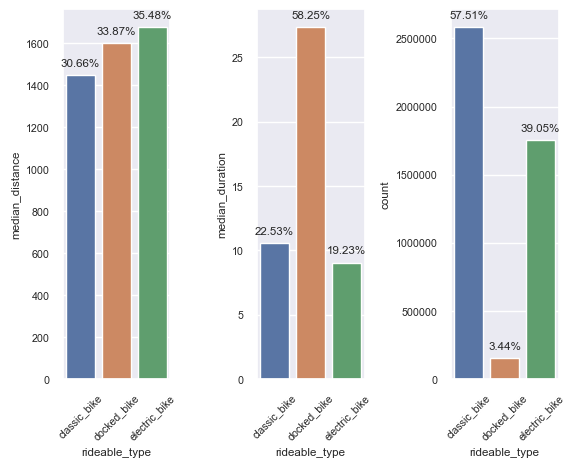

In [301]:
plt.subplot(1,3,1)
sb.barplot(x = 'rideable_type', y = 'median_distance', data =  df_by_rideable_type)
annotate_bar(plt.gca(), pct = True)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sb.barplot(x = 'rideable_type', y = 'median_duration', data =  df_by_rideable_type)
annotate_bar(plt.gca(), pct = True)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
plt.ticklabel_format(useOffset=False, style='plain')  # suppress scientific notation
sb.barplot(x = 'rideable_type', y = 'count', data =  df_by_rideable_type)
plt.xticks(rotation=45)
annotate_bar(plt.gca(), pct = True)
plt.subplots_adjust(wspace=0.8)



- People cycle further using electric bikes.
- The duration for rides on classic and electric bikes are the same, however docked_bikes rides last longer.
- The number of rides for docked bikes is small.

### Casual Riders and Members

In [73]:
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'distance', 'duration_days',
       'duration_minutes', 'duration_minutes_tot', 'day', 'month', 'year',
       'dow'],
      dtype='object')

In [74]:
df_by_member = df_clean[['member_casual', 'distance', 'duration_minutes_tot']].groupby('member_casual').agg(['count','median']).reset_index()
df_by_member.columns = df_by_member.columns.droplevel(1)
df_by_member.columns = ['member_casual', 'count', 'median_distance', 'count2', 'median_duration']
df_by_member.drop(columns='count2', inplace = True)
df_by_member = df_by_member.reindex(columns = df_by_member.columns.tolist() + ['classic_bike', 'docked_bike','electric_bike'])

casual_types = [
df_clean[(df_clean['member_casual'] == 'casual') &
         (df_clean['rideable_type'] == 'classic_bike')].count()[0],

df_clean[(df_clean['member_casual'] == 'casual') &
         (df_clean['rideable_type'] == 'docked_bike')].count()[0],

df_clean[(df_clean['member_casual'] == 'casual') &
         (df_clean['rideable_type'] == 'electric_bike')].count()[0]
]

member_types = [
df_clean[(df_clean['member_casual'] == 'member') &
         (df_clean['rideable_type'] == 'classic_bike')].count()[0],

df_clean[(df_clean['member_casual'] == 'member') &
         (df_clean['rideable_type'] == 'docked_bike')].count()[0],

df_clean[(df_clean['member_casual'] == 'member') &
         (df_clean['rideable_type'] == 'electric_bike')].count()[0]
]

df_by_member.loc[0] = df_by_member.loc[0].to_list()[:-3] + casual_types
df_by_member.loc[1] = df_by_member.loc[1].to_list()[:-3] + member_types
df_by_member

,member_casual,count,median_distance,median_duration,classic_bike,docked_bike,electric_bike
0,casual,1747907,1622.249902,13.083333,855180.0,154494.0,738233.0
1,member,2746774,1483.835204,8.750000,1729767.0,0.0,1017007.0


In [186]:
rides = df_by_member.loc[1, 'count'] + df_by_member.loc[0, 'count']
pct_casual_rides = round(df_by_member.loc[0, 'count'] / rides * 100,2)
pct_member_rides = round(df_by_member.loc[1,'count'] / rides * 100,2)
pct_casual_rides

38.89

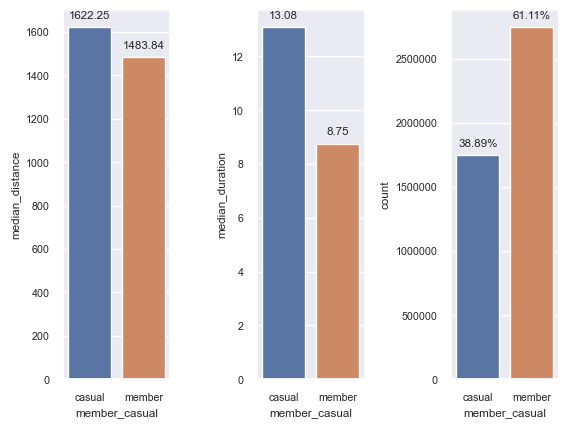

In [187]:
plt.subplot(1,3,1)
sb.barplot(x = 'member_casual', y = 'median_distance', data =  df_by_member)
annotate_bar(plt.gca())
plt.subplot(1,3,2)
sb.barplot(x = 'member_casual', y = 'median_duration', data =  df_by_member)
annotate_bar(plt.gca())
plt.subplot(1,3,3)
plt.ticklabel_format(useOffset=False, style='plain')
sb.barplot(x = 'member_casual', y = 'count', data =  df_by_member)
annotate_bar(plt.gca(),(f'{pct_casual_rides}%', f'{pct_member_rides}%'))
plt.subplots_adjust(wspace=0.8)

- Casual members spend more time cycling, and also tend to cycle a bit longer.
- Casual members account for almost 39% of rides, while the remaining 61% are done by members.

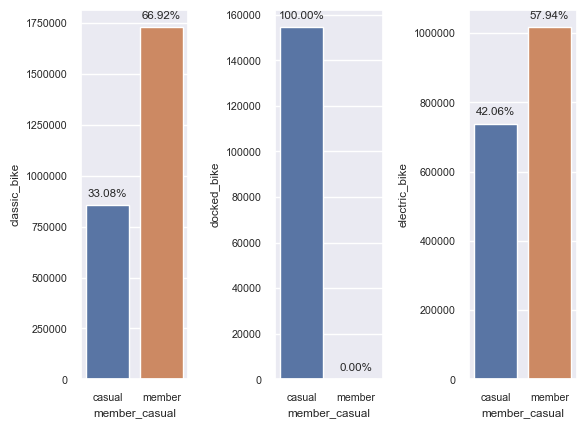

In [325]:

plt.subplot(1,3,1)
plt.ticklabel_format(useOffset=False, style='plain')
sb.barplot(x = 'member_casual', y = 'classic_bike', data =  df_by_member)
annotate_bar(plt.gca(), pct = True)
plt.subplot(1,3,2)
sb.barplot(x = 'member_casual', y = 'docked_bike', data =  df_by_member)
annotate_bar(plt.gca(), pct = True)
plt.subplot(1,3,3)
plt.ticklabel_format(useOffset=False, style='plain')
sb.barplot(x = 'member_casual', y = 'electric_bike', data =  df_by_member)
annotate_bar(plt.gca(), pct = True)
plt.subplots_adjust(wspace=0.8)  # Adjust the horizontal spacing between subplots


- Members use mostly classic and electric bikes.
- Docked bikes are only used by casual users.

### Rides by Month

In [79]:
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'distance', 'duration_days',
       'duration_minutes', 'duration_minutes_tot', 'day', 'month', 'year',
       'dow'],
      dtype='object')

In [200]:
df_by_month = df_clean[['duration_minutes_tot','member_casual','distance','month']].groupby(['member_casual','month']).agg('median','count').reset_index()
_ = df_clean[['ride_id','member_casual','month']].groupby(['member_casual','month']).count().reset_index()
df_by_month['count'] = _['ride_id']
df_by_month.columns = ['member_casual', 'month', 'median_duration_min', 'median_distance', 'count']
# df_by_month

Text(0.5, 1.0, 'Rides by Month')

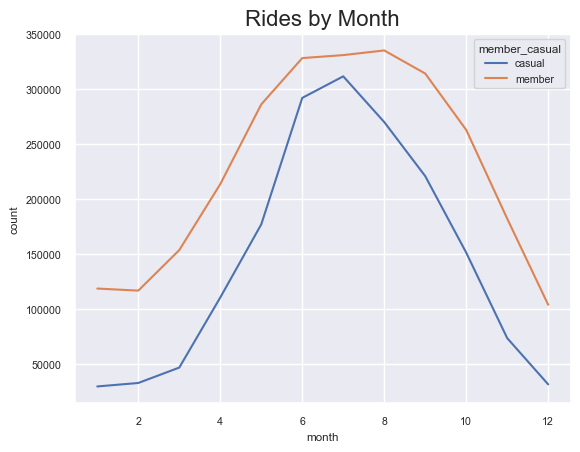

In [322]:
sb.lineplot(x = 'month', y = 'count', hue = 'member_casual', data = df_by_month)
plt.title('Rides by Month', fontsize =16)

- Both type of members have the same pattern of usage throughout the year.

In [85]:
df_by_day = df_clean[['duration_minutes_tot','member_casual','distance','day']].groupby(['member_casual','day']).agg('median','count').reset_index()
_ = df_clean[['ride_id','member_casual','day']].groupby(['member_casual','day']).count().reset_index()
df_by_day['count'] = _['ride_id']
df_by_day.columns = ['member_casual', 'day', 'median_duration', 'median_distance', 'count']
df_by_day

,member_casual,day,median_duration,median_distance,count
0,casual,1,12.350000,1599.573948,52191
1,casual,2,13.566667,1634.562817,62204
2,casual,3,13.941667,1624.848798,63946
3,casual,4,13.200000,1599.573948,58134
4,casual,5,13.750000,1630.610397,62368
...,...,...,...,...,...
57,member,27,8.716667,1481.782132,88844
58,member,28,8.633333,1472.239298,92104
59,member,29,8.866667,1499.163831,85193
60,member,30,8.800000,1495.102320,84616


<Axes: xlabel='day', ylabel='median_duration'>

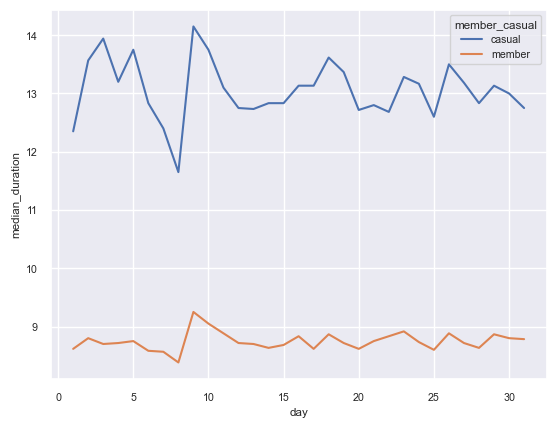

In [306]:
# plt.subplot(2,2,1)
sb.lineplot(x = 'day', y = 'median_duration', hue = 'member_casual', data = df_by_day)
# plt.subplot(2,2,2)
# sb.lineplot(x = 'day', y = 'median_distance', hue = 'member_casual', data = df_by_day)
# plt.subplot(2,2,3)
# sb.barplot(x = 'day', y = 'count', hue = 'member_casual', data = df_by_day)
# plt.show()

- No particular trend when comparing days

In [94]:
df_by_dow = df_clean[['duration_minutes_tot','member_casual','distance','dow']].groupby(['member_casual','dow']).median().reset_index()
_ = df_clean[['ride_id','member_casual','dow']].groupby(['member_casual','dow']).count().reset_index()
df_by_dow['count'] = _['ride_id']
df_by_dow.columns = ['member_casual', 'dow', 'median_duration', 'median_distance', 'count']
df_by_dow

,member_casual,dow,median_duration,median_distance,count
0,casual,0,12.533333,1539.951726,194974
1,casual,1,11.566667,1575.441350,202337
2,casual,2,11.483333,1595.396916,218113
3,casual,3,11.766667,1602.366671,233766
4,casual,4,12.800000,1616.521301,258175
5,casual,5,15.183333,1713.156750,350970
6,casual,6,15.333333,1667.515107,289572
7,member,0,8.250000,1415.640829,374374
8,member,1,8.450000,1460.397252,438809
9,member,2,8.566667,1481.782132,456846


Text(0.5, 1.0, 'Rides - Day of the Week')

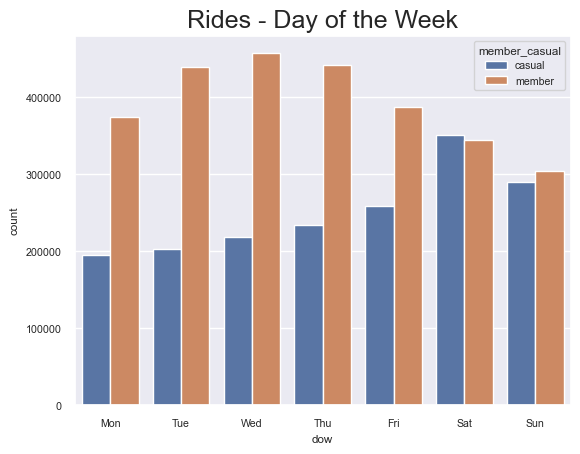

In [319]:
sb.barplot(x = 'dow', y = 'count', hue = 'member_casual', data = df_by_dow)
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.title('Rides - Day of the Week', fontsize = 18);

- Casual members usage peaks on weekend, even surprassing members.
- Members usage is highest during the week

Text(0.5, 1.0, 'Median Ride Duration - Day of the Week')

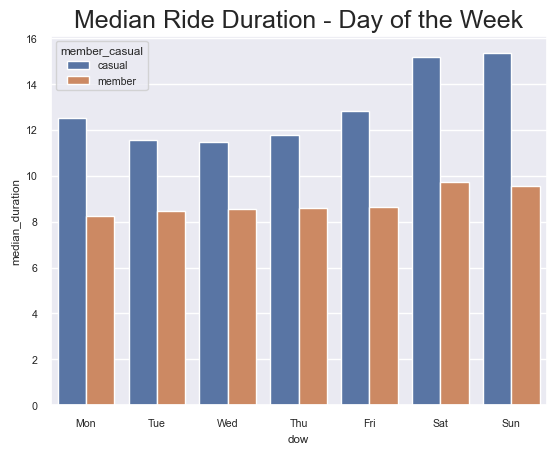

In [320]:
sb.barplot(x = 'dow', y = 'median_duration', hue = 'member_casual', data = df_by_dow)
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.title('Median Ride Duration - Day of the Week', fontsize = 18)

- Casual members rides will last longer every day of the week.

Text(0.5, 1.0, 'Median Distance - Day of the Week')

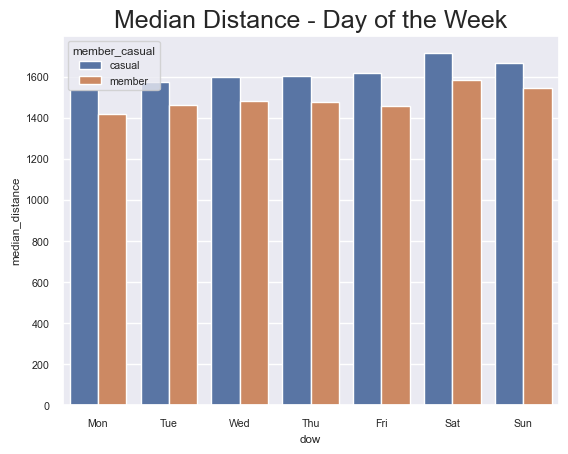

In [321]:
sb.barplot(x = 'dow', y = 'median_distance', hue = 'member_casual', data = df_by_dow)
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
plt.title('Median Distance - Day of the Week', fontsize = 18)

- Distances for both type of users are almost the same. However Casual users will ride a little bit further.

In [106]:
df_clean['quarter'] = df_clean['month'].apply(lambda x: 1 if 1 <= x <= 3 else
                                        2 if 4 <= x <= 6 else
                                        3 if 7 <= x <= 9 else
                                        4 )

In [214]:
df_quarters = df_clean[['quarter','duration_minutes_tot']].groupby('quarter').sum().reset_index()

In [215]:
df_quarters

,quarter,duration_minutes_tot
0,1,5769366.88
1,2,24743052.22
2,3,31755556.72
3,4,10934324.18


In [218]:
df_m_c_min = df_clean[['member_casual','duration_minutes_tot']].groupby('member_casual').sum().reset_index()

In [219]:
df_m_c_min

,member_casual,duration_minutes_tot
0,casual,39710358.77
1,member,33491941.23


In [271]:
df_clean['start_hour'] = df_clean['started_at'].dt.hour
# Peak hour of day for rides
peak_hour = df_clean['start_hour'].mode()[0]

# Peak day of week for rides
peak_day = df_clean['dow'].mode()[0]

In [272]:
peak_day, peak_hour

(5, 17)

Peak day is Friday. Peak hour is 5pm.

## Rides per Hour -  Members vs Casual

Text(0.5, 1.0, 'Total Rides Hourly Grouped - Member vs Casual')

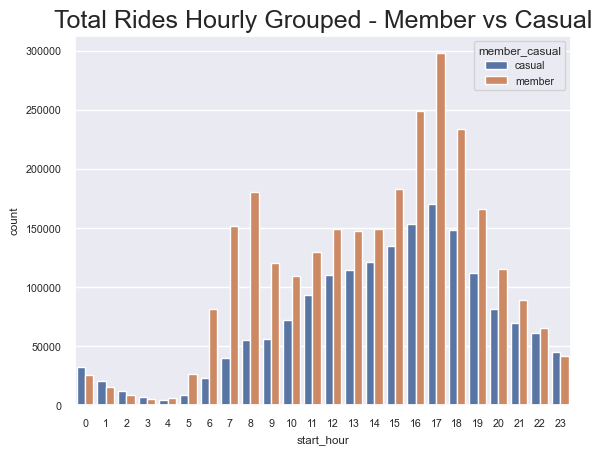

In [316]:
sb.countplot(data=df_clean, x='start_hour', hue='member_casual')#, order=order)
plt.title('Total Rides Hourly Grouped - Member vs Casual', fontsize = 18)


- Casual Riders cycle more in the afternoon, while members cycle in thee morning and in the afternoon.

# Locations

In [220]:
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'distance', 'duration_days',
       'duration_minutes', 'duration_minutes_tot', 'day', 'month', 'year',
       'dow', 'quarter'],
      dtype='object')

In [254]:
df_location_starts = df_clean[['start_station_name','duration_minutes_tot','distance']].groupby('start_station_name').agg(['sum','mean','median','count'])

In [256]:
df_location_starts.columns = df_location_starts.columns.droplevel(1)
# df_location_starts.columns = df_location_starts.columns.droplevel(0)
df_location_starts.columns = ['dur_sum', 'dur_mean', 'dur_median', 'dur_count', 'dis_sum','dis_mean','dis_median','count']
df_location_starts.drop(columns='dur_count', inplace = True)

In [260]:
df_location_starts.sort_values('count', ascending = False).head(10)

,dur_sum,dur_mean,dur_median,dis_sum,dis_mean,dis_median,count
start_station_name,,,,,,,
Streeter Dr & Grand Ave,2175268.62,31.48,22.63,169080929.15,2447.01,1707.55,69097
DuSable Lake Shore Dr & Monroe St,1279767.67,32.90,23.15,82740743.66,2127.28,1316.25,38895
Michigan Ave & Oak St,1093654.88,29.48,20.57,98883470.20,2665.83,2244.54,37093
DuSable Lake Shore Dr & North Blvd,888600.03,24.10,17.17,96329500.85,2613.10,2451.42,36864
Wells St & Concord Ln,471097.85,13.73,9.95,73590714.54,2144.19,1933.94,34321
Clark St & Elm St,454715.90,13.68,9.50,64634932.96,1943.91,1521.66,33250
Millennium Park,1051917.95,32.75,20.93,63490209.19,1976.90,1463.35,32116
Kingsbury St & Kinzie St,333061.35,10.38,7.12,50157738.18,1562.89,1213.81,32093
Theater on the Lake,788682.37,25.50,19.00,88083321.10,2848.10,2674.88,30927


In [263]:
df_location_ends = df_clean[['end_station_name','duration_minutes_tot','distance']].groupby('end_station_name').agg(['sum','mean','median','count'])
# df_location_ends.columns = df_location_starts.columns.droplevel(0)
df_location_ends.columns = ['dur_sum', 'dur_mean', 'dur_median', 'dur_count', 'dis_sum','dis_mean','dis_median','count']
df_location_ends.drop(columns='dur_count', inplace = True)

In [266]:
df_location_ends.sort_values('count', ascending = False).head(10)

,dur_sum,dur_mean,dur_median,dis_sum,dis_mean,dis_median,count
end_station_name,,,,,,,
Streeter Dr & Grand Ave,2372568.33,33.60,24.15,172289219.87,2439.91,1639.71,70613
DuSable Lake Shore Dr & North Blvd,1044047.63,26.21,18.74,108150037.89,2714.88,2482.54,39836
Michigan Ave & Oak St,1158043.52,30.45,21.77,99881727.38,2626.32,2213.22,38031
DuSable Lake Shore Dr & Monroe St,1249675.60,33.02,24.83,98497004.52,2602.78,1529.68,37843
Wells St & Concord Ln,464511.55,13.35,9.93,74192555.91,2133.01,1933.94,34783
Millennium Park,1046905.58,31.55,20.77,63480912.67,1913.06,1462.23,33183
Clark St & Elm St,442042.03,13.45,9.42,61298653.66,1864.54,1472.25,32876
Theater on the Lake,879007.08,28.00,21.93,96263988.92,3065.93,2872.43,31398
Kingsbury St & Kinzie St,302201.72,9.72,7.04,49037406.51,1576.66,1220.05,31102


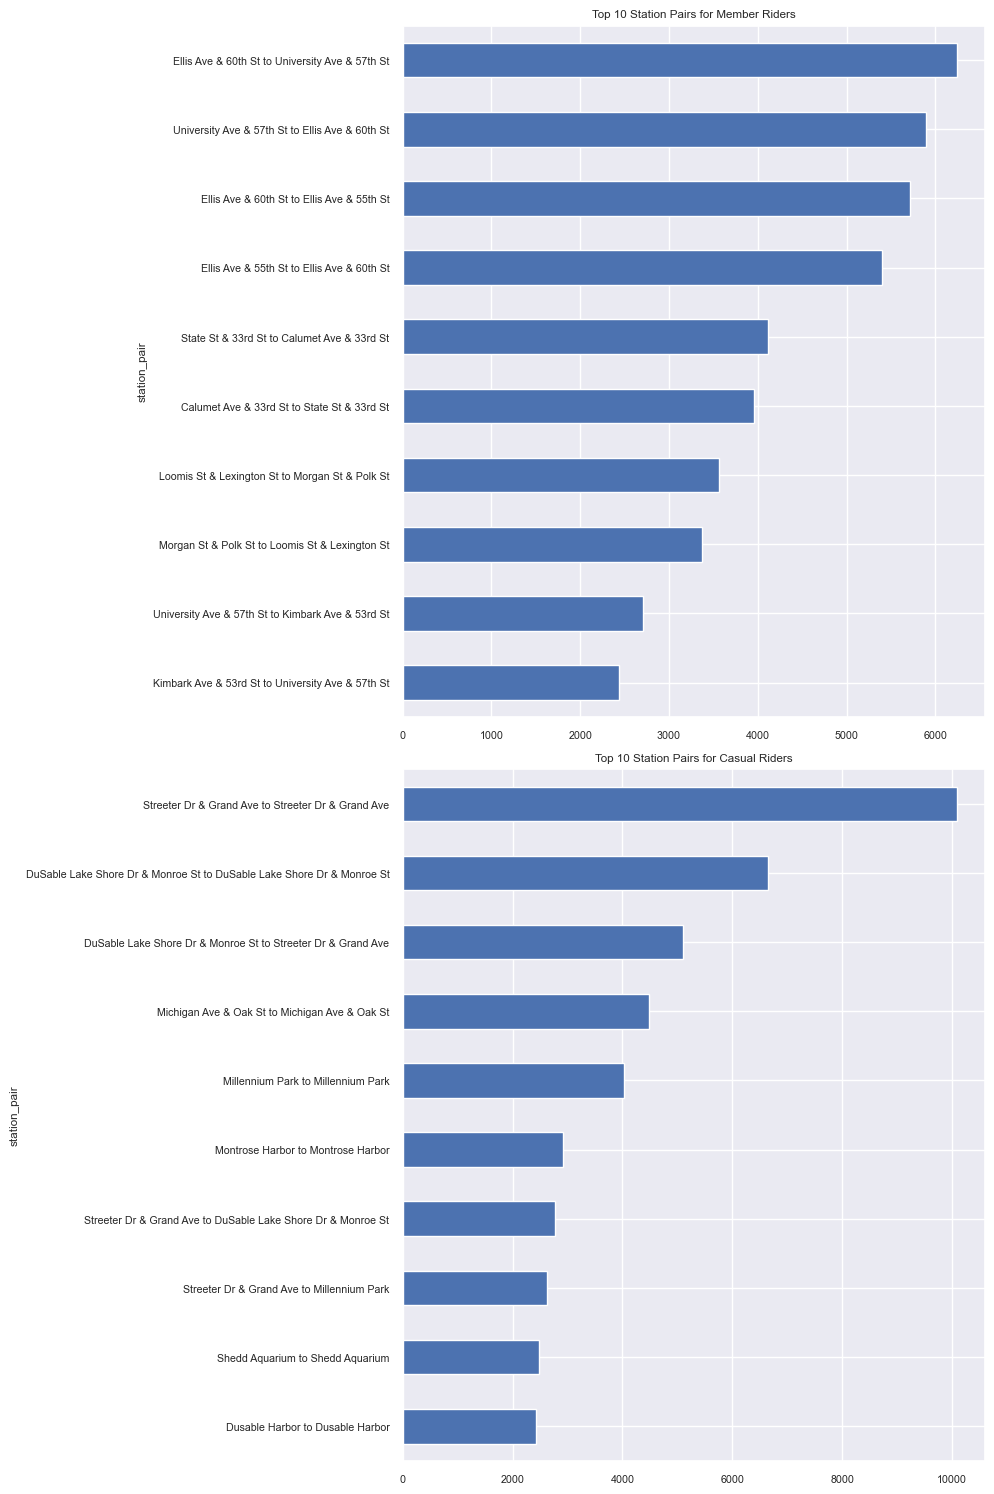

In [298]:
df_clean['station_pair'] = df_clean[['start_station_name','end_station_name']].apply(lambda row: f"{row['start_station_name']} to {row['end_station_name']}", axis = 1)


top_member_station_pairs = df_clean[df_clean['member_casual'] == 'member']['station_pair'].value_counts().head(10)
top_casual_station_pairs = df_clean[df_clean['member_casual'] == 'casual']['station_pair'].value_counts().head(10)


fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# member riders
top_member_station_pairs.plot(kind='barh', ax=ax[0])
ax[0].set_title('Top 10 Station Pairs for Member Riders')
ax[0].invert_yaxis()

# casual riders
top_casual_station_pairs.plot(kind='barh', ax=ax[1])
ax[1].set_title('Top 10 Station Pairs for Casual Riders')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()
                                                                                     
#1m30s

# Conclusion

The data suggests that there are some differences in how and when member and casual riders use the bike sharing service. For instance, members seem to use the service consistently across the week, potentially for commuting, while casual riders use the service more on weekends, suggesting more leisure-oriented usage.

Some strategies that could potentially help convert casual riders to members:

Targeted Marketing Campaigns:  
We observed that casual riders use the service more on weekends, while member usage is more evenly spread throughout the week. This suggests that casual riders may be using the service for leisure or tourism. Therefore, marketing campaigns could highlight the benefits of membership for these activities. For example, a campaign could show how a membership can enhance weekend leisure rides or sightseeing activities.

Partnerships with Tourist Attractions:  
As casual riders may be tourists, partnerships could be formed with local tourist attractions or travel agencies to offer special membership packages or discounts.

Improve and Highlight Service at Popular Locations:  
The data showed some stations are more popular among casual riders. Improving service at these stations (e.g., ensuring bike availability, maintenance) and highlighting the advantages of membership for usage at these stations could attract more casual riders to become members.